In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mukul1653","key":"1262506668e93c50ba2e5ea3df369e37"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-19 07:30:16          10902  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6669  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2522  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2680  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 340M/346M [00:05<00:00, 79.1MB/s]
100% 346M/346M [00:05<00:00, 61.1MB/s]


In [ ]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
# importing all the libraries
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

In [ ]:
Img_size = [224,224]

In [ ]:
 # provide the path
 training_path = '/content/seg_train'
 testing_path = '/content/seg_test'

In [ ]:
#visualisation of the image using openCV
import cv2
from google.colab.patches import cv2_imshow
 
 #provide the path of the image which we want to visualise
img = cv2.imread('/content/seg_train/seg_train/buildings/10014.jpg')
img1 = cv2.imread('/content/seg_train/seg_train/buildings/10029.jpg')

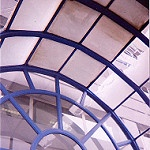

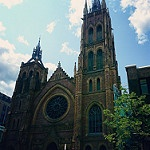

In [ ]:
#showing the image
cv2_imshow(img)
#showing the image
cv2_imshow(img1)

In [ ]:
vgg = VGG16(input_shape = Img_size + [3], weights = 'imagenet', include_top = False)
for layer in vgg.layers:
  layer.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
#let us check how many folders are there in the directory
folders = glob('/content/seg_train/seg_train/*')
print(f'No of classes in the training set is {len(folders)}')

No of classes in the training set is 6


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# **VGG16**

In [ ]:
from keras import optimizers

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],)

In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode = 'nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(
        '/content/seg_train/seg_train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
        '/content/seg_test/seg_test',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
model_history = model.fit_generator(
    train_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(train_set),
    validation_steps = len(test_set)
    )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
439/439 [==============================] - 300s 599ms/step - loss: 6.1895 - accuracy: 0.8085 - val_loss: 7.3942 - val_accuracy: 0.8403
Epoch 2/20
439/439 [==============================] - 247s 563ms/step - loss: 6.4506 - accuracy: 0.8506 - val_loss: 8.1449 - val_accuracy: 0.8523
Epoch 3/20
439/439 [==============================] - 247s 562ms/step - loss: 7.3804 - accuracy: 0.8586 - val_loss: 8.8177 - val_accuracy: 0.8543
Epoch 4/20
439/439 [==============================] - 244s 556ms/step - loss: 7.5660 - accuracy: 0.8637 - val_loss: 8.6216 - val_accuracy: 0.8560
Epoch 5/20
439/439 [==============================] - 242s 551ms/step - loss: 7.6096 - accuracy: 0.8712 - val_loss: 9.4540 - val_accuracy: 0.8600
Epoch 6/20
439/439 [==============================] - 243s 554ms/step - loss: 7.6165 - accuracy: 0.8743 - val_loss: 10.9128 - val_accuracy: 0.8480
Epoch 7/20
439/439 [==============================] - 244s 557ms/step - loss: 7.9002 - accuracy: 0.8791 - val_loss: 10.4891

In [ ]:
performance=pd.DataFrame(model_history.history)

In [ ]:
performance

,loss,accuracy,val_loss,val_accuracy
0,6.189491,0.808536,7.394160,0.840333
1,6.450638,0.850577,8.144901,0.852333
2,7.380384,0.858629,8.817735,0.854333
3,7.565968,0.863688,8.621628,0.856000
4,7.609589,0.871170,9.453971,0.860000
5,7.616464,0.874305,10.912803,0.848000
6,7.900210,0.879079,10.489095,0.864667
7,8.073270,0.879721,9.428267,0.853000
8,8.464911,0.878723,11.269237,0.861333
9,8.929040,0.875944,12.168907,0.857667


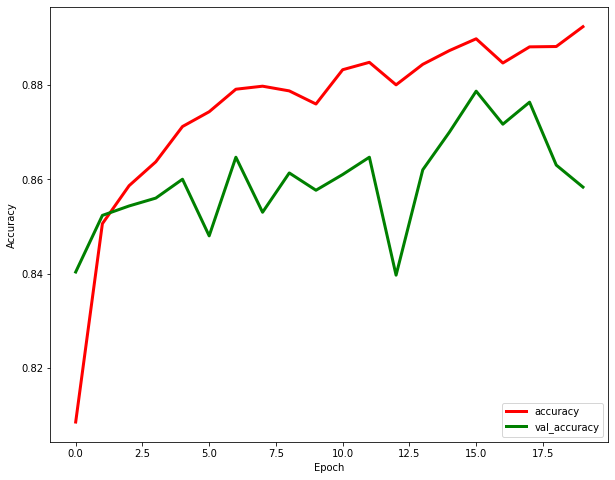

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(model_history.history['accuracy'], label='accuracy',color = 'r', linewidth=3.0)
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy',color = 'g',linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(f' Max accuracy on the training set of {performance["accuracy"].max()*100}%')
print(f' Max accuracy on the testing set of {performance["val_accuracy"].max()*100}%')

 Max accuracy on the training set of 89.2332911491394%
 Max accuracy on the testing set of 87.8666639328003%


# **ResNet50**

In [ ]:
rnet = ResNet50(input_shape = Img_size + [3], weights = 'imagenet', include_top = False)
for layer in rnet.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(rnet.output)
prediction = Dense(len(folders),activation = 'softmax')(x)
model = Model(inputs = rnet.input, outputs = prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
from keras import optimizers

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],)

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
        rotation_range = 40,
        width_shift_range = 0.5,
        height_shift_range = 0.5,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode = 'nearest')

In [ ]:
train = train_datagen.flow_from_directory(
        '/content/seg_train/seg_train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
test = train_datagen.flow_from_directory(
        '/content/seg_test/seg_test',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [ ]:
model_rnet = model.fit(
    train,
    validation_data = test,
    epochs = 35,
    steps_per_epoch = len(train),
    validation_steps = len(test)
)

Epoch 1/35
439/439 [==============================] - 259s 580ms/step - loss: 5.8542 - accuracy: 0.7728 - val_loss: 5.2494 - val_accuracy: 0.8193
Epoch 2/35
439/439 [==============================] - 251s 571ms/step - loss: 7.1492 - accuracy: 0.8083 - val_loss: 6.6802 - val_accuracy: 0.8200
Epoch 3/35
439/439 [==============================] - 249s 567ms/step - loss: 7.0552 - accuracy: 0.8235 - val_loss: 7.7169 - val_accuracy: 0.8237
Epoch 4/35
439/439 [==============================] - 247s 562ms/step - loss: 7.7149 - accuracy: 0.8296 - val_loss: 8.9283 - val_accuracy: 0.8153
Epoch 5/35
439/439 [==============================] - 247s 562ms/step - loss: 7.8128 - accuracy: 0.8371 - val_loss: 8.5809 - val_accuracy: 0.8320
Epoch 6/35
439/439 [==============================] - 252s 574ms/step - loss: 8.0190 - accuracy: 0.8384 - val_loss: 8.7793 - val_accuracy: 0.8233
Epoch 7/35
439/439 [==============================] - 251s 571ms/step - loss: 7.9799 - accuracy: 0.8426 - val_loss: 9.2949 -

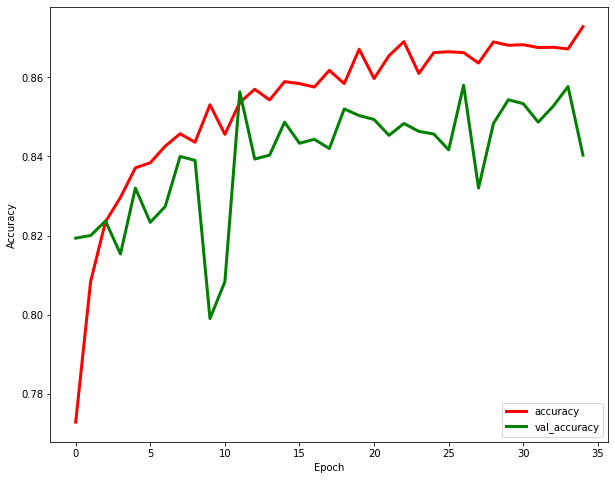

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(model_rnet.history['accuracy'], label='accuracy',color = 'r', linewidth=3.0)
plt.plot(model_rnet.history['val_accuracy'], label = 'val_accuracy',color = 'g',linewidth=3.0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
r_performance=pd.DataFrame(model_history.history)
print(f' Max accuracy on the training set of {r_performance["accuracy"].max()*100}%')
print(f' Max accuracy on the testing set of {r_performance["val_accuracy"].max()*100}%')

 Max accuracy on the training set of 89.2332911491394%
 Max accuracy on the testing set of 87.8666639328003%
